In [1]:
!pip install statsbombpy==1.6.1 --quiet
!pip install mplsoccer==1.1.10 --quiet
!pip install kloppy==3.7.1 --quiet

In [10]:
# !pip uninstall matplotlib
!pip install matplotlib


In [11]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install mplsoccer==1.1.4 --no-cache-dir --force-reinstall


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 71.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 63.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 12.9/12.9 MB 90.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 77.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 11.6/11.6 MB 103.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ------------------ --------------------- 19.4/41.2 MB 94.3 MB/s eta 0:00:01
   ------------------------------------ --- 37.7/41.2 MB 88.8 MB/s eta 0:00:01
   --------------------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [5]:
pip install mplsoccer==1.1.4 --no-cache-dir


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Note: you may need to restart the kernel to use updated packages.


## Imports

In [1]:
from statsbombpy import sb
import mplsoccer as mpl
from kloppy import metrica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Encodage des couleurs pour les heatmap

In [2]:
from matplotlib.colors import ListedColormap, to_hex
def bulid_cmap(x, y):
    r,g,b = x
    r_, g_, b_ = y
    N = 256
    A = np.ones((N, 4))
    A[:, 0] = np.linspace(r, 1, N)
    A[:, 1] = np.linspace(g, 1, N)
    A[:, 2] = np.linspace(b, 1, N)
    cmp = ListedColormap(A)

    B = np.ones((N, 4))
    B[:, 0] = np.linspace(r_, 1, N)
    B[:, 1] = np.linspace(g_, 1, N)
    B[:, 2] = np.linspace(b_, 1, N)
    cmp_ = ListedColormap(B)

    newcolors = np.vstack((cmp(np.linspace(0, 1, 128)),
                            cmp_(np.linspace(1, 0, 128))))
    return ListedColormap(newcolors)


blue, red = (44,123,182), (215,25,28)
blue = [x/256 for x in blue]
red = [x/256 for x in red]
diverging = bulid_cmap(blue, red)
diverging_r = bulid_cmap(red, blue)

## Exploration de la base de donnée

Statsbomb est une entreprise qui fournit des données de matchs de foot, ils ont une librairie python qui permet d'avoir toutes les données sur toutes les compétitions et les matchs (https://github.com/statsbomb/statsbombpy et https://statsbomb.com/fr/). Voici comment on peut l'utiliser :

In [3]:
#Montrer  les compétitions

sb.competitions()

competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
69              55         43         Europe               UEFA Euro   
70              35         75         Europe      UEFA Europa League   
71              53        106         Europe       UEFA Women's Euro   
72              72        107  International       Women's World Cup   
73              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                       True   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
69               male              False                       True   
70               male              False                      False   
71             female              False                       True   
72             female              False                       True   
73             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2023/2024  2024-07-15T14:15:54.671676  2024-07-15T14:17:00.877356   
1    2015/2016  2024-05-19T11:11:14.192381                        None   
2         2023  2024-06-13T07:51:02.452825                        None   
3    2018/2019  2024-06-12T07:44:38.559714     2021-06-13T16:17:31.694   
4    2017/2018  2024-02-13T02:35:28.134882     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
69        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   
70   1988/1989  2024-02-12T14:45:05.702250     2021-06-13T16:17:31.694   
71        2022  2024-02-13T13:27:17.178263  2024-02-13T13:30:52.820588   
72        2023  2024-07-14T16:59:48.469596  2024-07-14T17:01:38.887279   
73        2019  2024-02-13T09:41:26.379767     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0   2024-07-15T14:17:00.877356  2024-07-15T14:15:54.671676  
1                         None  2024-05-19T11:11:14.192381  
2                         None  2024-06-13T07:51:02.452825  
3                         None  2024-06-12T07:44:38.559714  
4                         None  2024-02-13T02:35:28.134882  
..                         ...                         ...  
69  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402  
70                        None  2024-02-12T14:45:05.702250  
71  2024-02-13T13:30:52.820588  2024-02-13T13:27:17.178263  
72  2024-07-14T17:01:38.887279  2024-07-14T16:59:48.469596  
73                        None  2024-02-13T09:41:26.379767  

[74 rows x 12 columns]

In [4]:
# Montrer les matchs d'une compétition pour une certaines saison

competition_id = 43
season_id = 106

matches = sb.matches(competition_id=competition_id, season_id=season_id)

In [5]:
matches.head(5)

match_id  match_date      kick_off                     competition season  \
0   3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1   3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2   3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3   3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4   3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   

   home_team    away_team  home_score  away_score match_status  ...  \
0     Serbia  Switzerland           2           3    available  ...   
1  Argentina    Australia           2           1    available  ...   
2  Australia      Denmark           1           0    available  ...   
3     Brazil       Serbia           2           0    available  ...   
4    Tunisia    Australia           0           1    available  ...   

             last_updated_360 match_week competition_stage  \
0  2023-04-26T23:49:58.956186          3       Group Stage   
1  2023-07-30T07:48:51.865595          4       Round of 16   
2  2023-06-20T11:04:37.638969          3       Group Stage   
3  2023-07-11T14:56:31.096588          1       Group Stage   
4  2023-04-27T00:30:07.835815          2       Group Stage   

                 stadium                    referee             home_managers  \
0            Stadium 974  Fernando Andrés Rapallini          Dragan Stojković   
1  Ahmad bin Ali Stadium           Szymon Marciniak  Lionel Sebastián Scaloni   
2   Al Janoub Stadium              Mustapha Ghorbal       Graham James Arnold   
3         Lusail Stadium            Alireza Faghani     Telê Santana da Silva   
4   Al Janoub Stadium                Daniel Siebert               Jalel Kadri   

         away_managers data_version shot_fidelity_version xy_fidelity_version  
0          Murat Yakin        1.1.0                     2                   2  
1  Graham James Arnold        1.1.0                     2                   2  
2      Kasper Hjulmand        1.1.0                     2                   2  
3     Dragan Stojković        1.1.0                     2                   2  
4  Graham James Arnold        1.1.0                     2                   2  

[5 rows x 22 columns]

In [6]:
#Les différentes variables
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               64 non-null     int64 
 1   match_date             64 non-null     object
 2   kick_off               64 non-null     object
 3   competition            64 non-null     object
 4   season                 64 non-null     object
 5   home_team              64 non-null     object
 6   away_team              64 non-null     object
 7   home_score             64 non-null     int64 
 8   away_score             64 non-null     int64 
 9   match_status           64 non-null     object
 10  match_status_360       64 non-null     object
 11  last_updated           64 non-null     object
 12  last_updated_360       64 non-null     object
 13  match_week             64 non-null     int64 
 14  competition_stage      64 non-null     object
 15  stadium                64

Nous avons également une base de données des évenements pour chaque match, essayons de trouver les données pour la finale de la coupe du monde 2022.

In [7]:
final = matches[matches['competition_stage'] == "Final"].iloc[0]
match_id = final.loc['match_id']

events = sb.events(match_id = match_id)
events

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0      NaN                NaN                  NaN                     NaN   
1      NaN                NaN                  NaN                     NaN   
2      NaN                NaN                  NaN                     NaN   
3      NaN                NaN                  NaN                     NaN   
4      NaN                NaN                  NaN                     NaN   
...    ...                ...                  ...                     ...   
4402   NaN                NaN                  NaN                     NaN   
4403   NaN                NaN                  NaN                     NaN   
4404   NaN                NaN                  NaN                     NaN   
4405   NaN        Yellow Card                  NaN                     NaN   
4406   NaN        Yellow Card                  NaN                     NaN   

     ball_recovery_recovery_failure block_deflection block_offensive  \
0                               NaN              NaN             NaN   
1                               NaN              NaN             NaN   
2                               NaN              NaN             NaN   
3                               NaN              NaN             NaN   
4                               NaN              NaN             NaN   
...                             ...              ...             ...   
4402                            NaN              NaN             NaN   
4403                            NaN              NaN             NaN   
4404                            NaN              NaN             NaN   
4405                            NaN              NaN             NaN   
4406                            NaN              NaN             NaN   

     carry_end_location clearance_aerial_won clearance_body_part  ...  \
0                   NaN                  NaN                 NaN  ...   
1                   NaN                  NaN                 NaN  ...   
2                   NaN                  NaN                 NaN  ...   
3                   NaN                  NaN                 NaN  ...   
4                   NaN                  NaN                 NaN  ...   
...                 ...                  ...                 ...  ...   
4402                NaN                  NaN                 NaN  ...   
4403                NaN                  NaN                 NaN  ...   
4404                NaN                  NaN                 NaN  ...   
4405                NaN                  NaN                 NaN  ...   
4406                NaN                  NaN                 NaN  ...   

     shot_statsbomb_xg shot_technique shot_type substitution_outcome  \
0                  NaN            NaN       NaN                  NaN   
1                  NaN            NaN       NaN                  NaN   
2                  NaN            NaN       NaN                  NaN   
3                  NaN            NaN       NaN                  NaN   
4                  NaN            NaN       NaN                  NaN   
...                ...            ...       ...                  ...   
4402               NaN            NaN       NaN                  NaN   
4403               NaN            NaN       NaN                  NaN   
4404               NaN            NaN       NaN                  NaN   
4405               NaN            NaN       NaN                  NaN   
4406               NaN            NaN       NaN                  NaN   

     substitution_replacement  \
0                         NaN   
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
...                       ...   
4402                      NaN   
4403                      NaN   
4404                      NaN   
4405                      NaN   
4406                      NaN   

                                                tactics       te

In [8]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 90 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   50_50                           8 non-null      object 
 1   bad_behaviour_card              2 non-null      object 
 2   ball_receipt_outcome            120 non-null    object 
 3   ball_recovery_offensive         1 non-null      object 
 4   ball_recovery_recovery_failure  13 non-null     object 
 5   block_deflection                1 non-null      object 
 6   block_offensive                 1 non-null      object 
 7   carry_end_location              940 non-null    object 
 8   clearance_aerial_won            8 non-null      object 
 9   clearance_body_part             45 non-null     object 
 10  clearance_head                  25 non-null     object 
 11  clearance_left_foot             8 non-null      object 
 12  clearance_other                 2 

On voit qu'il y a quand même beaucoup de données, essayons d'en analyser et d'en afficher quelques unes.

### Analyses des passes

Analysons les passes du player 5503 qui est Messi (on peut aussi imaginer chercher M'Bappe pour comparer)

In [9]:
passes_messi = events[(events['type'] == "Pass") &
                (events['player_id'] == 5503)]
passes_messi.head(5)

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
36    NaN                NaN                  NaN                     NaN   
39    NaN                NaN                  NaN                     NaN   
52    NaN                NaN                  NaN                     NaN   
62    NaN                NaN                  NaN                     NaN   
103   NaN                NaN                  NaN                     NaN   

    ball_recovery_recovery_failure block_deflection block_offensive  \
36                             NaN              NaN             NaN   
39                             NaN              NaN             NaN   
52                             NaN              NaN             NaN   
62                             NaN              NaN             NaN   
103                            NaN              NaN             NaN   

    carry_end_location clearance_aerial_won clearance_body_part  ...  \
36                 NaN                  NaN                 NaN  ...   
39                 NaN                  NaN                 NaN  ...   
52                 NaN                  NaN                 NaN  ...   
62                 NaN                  NaN                 NaN  ...   
103                NaN                  NaN                 NaN  ...   

    shot_statsbomb_xg shot_technique shot_type substitution_outcome  \
36                NaN            NaN       NaN                  NaN   
39                NaN            NaN       NaN                  NaN   
52                NaN            NaN       NaN                  NaN   
62                NaN            NaN       NaN                  NaN   
103               NaN            NaN       NaN                  NaN   

    substitution_replacement tactics       team     timestamp  type  \
36                       NaN     NaN  Argentina  00:02:16.985  Pass   
39                       NaN     NaN  Argentina  00:02:27.185  Pass   
52                       NaN     NaN  Argentina  00:03:52.966  Pass   
62                       NaN     NaN  Argentina  00:04:26.443  Pass   
103                      NaN     NaN  Argentina  00:07:11.325  Pass   

    under_pressure  
36            True  
39             NaN  
52             NaN  
62             NaN  
103            NaN  

[5 rows x 90 columns]

On créé une base avec uniquement les coordonnées de départ et d'arrivées des passes de Messi pour pouvoir les afficher.

In [10]:
coordinates = passes_messi[['location', 'pass_end_location']]

x1, y1 = np.array(coordinates['location'].tolist()).T
x2, y2 = np.array(coordinates['pass_end_location'].tolist()).T

Nous pouvons maintenant afficher ça, grâce à mpl qui est une bibliothèque spécialement créé pour l'analyse des matchs de foot (https://mplsoccer.readthedocs.io/en/latest/)

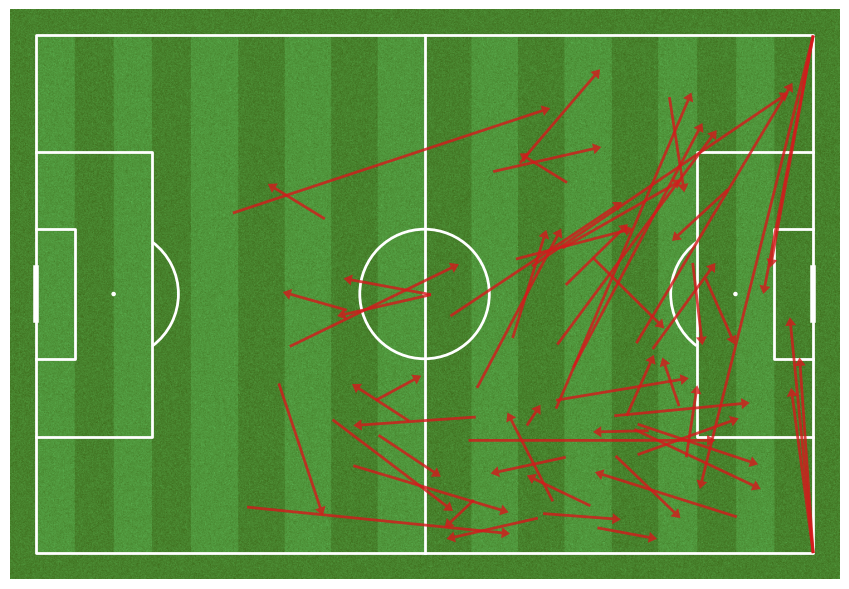

In [11]:
#Tu peux spécifier les paramètres pour l'affichage
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))

p = pitch.arrows(x1, y1, x2, y2, alpha=0.8, color=red,
                 headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax)

Faisons la même chose avec les tirs

### Analyse des tirs

On va le faire pour l'argentine puis pour la france pour comparer (pas ouf la france)

In [12]:
shots = events[(events['type'] == "Shot") &
               (events['team'] == "Argentina") &
               (events['shot_type'] != "Penalty")]

In [13]:
x, y = np.array(shots['location'].tolist()).T
xg = np.array(shots['shot_statsbomb_xg'].tolist())
goal = [red if g == "Goal" else 'black' for g in shots['shot_outcome'].to_list()]

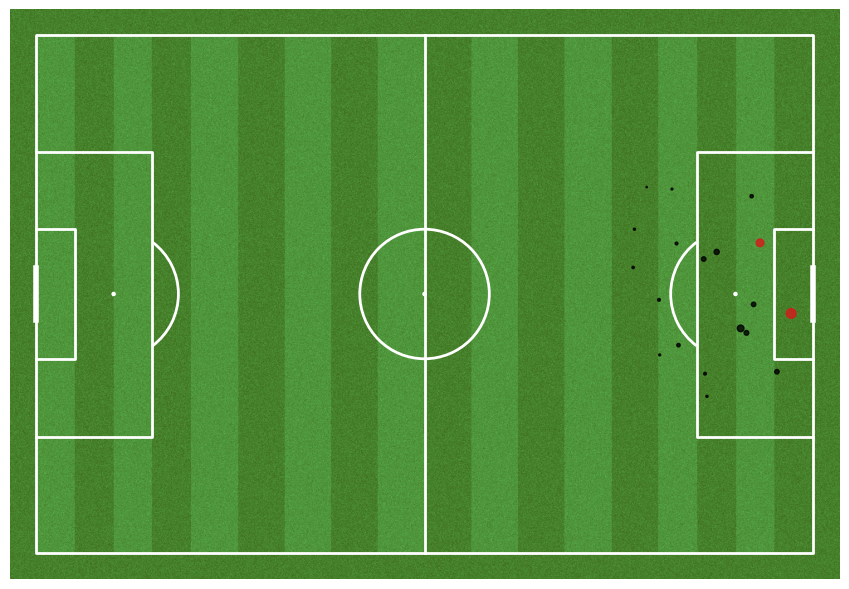

In [14]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.scatter(x, y, s=xg*100, c=goal, alpha=0.8, ax=ax)

In [15]:
shots = events[(events['type'] == "Shot") &
               (events['team'] == "France") &
               (events['shot_type'] != "Penalty")]

In [16]:
x, y = np.array(shots['location'].tolist()).T
xg = np.array(shots['shot_statsbomb_xg'].tolist())
goal = [red if g == "Goal" else 'black' for g in shots['shot_outcome'].to_list()]

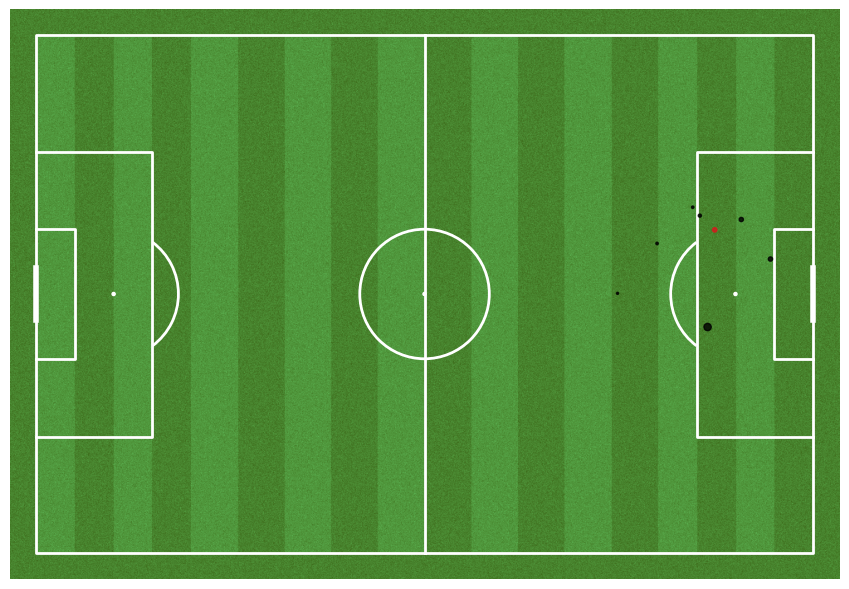

In [17]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.scatter(x, y, s=xg*100, c=goal, alpha=0.8, ax=ax)

Jusqu'à maintenant on a analysé des événements factuels pour comparer, la on va essayer de "moyenner" tout ça et avoir une analyse plus gloale du match, pour savoir sur quelles parties du terrain se sont passées le plus de choses, on va donc faire ce qu'on appelle uen heatmap, cette fois-ci pour la france

### Analyse en heatmap

In [18]:
arg_events = events[~pd.isna(events['location']) &
                    (events['team'] == "France")]

In [19]:
x, y = np.array(arg_events['location'].tolist()).T

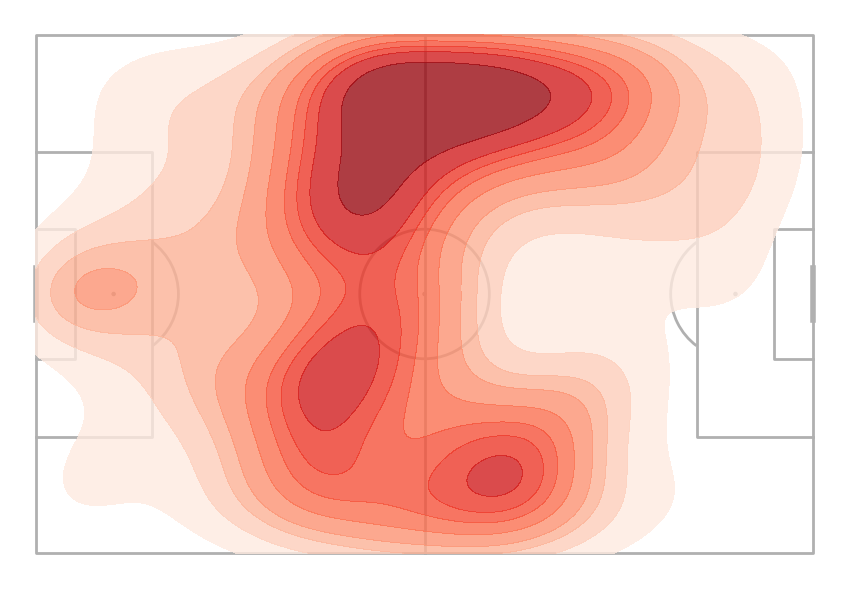

In [20]:
#Ici on garde en blanc pcq sinon c'est moche

pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
k = pitch.kdeplot(x, y, cmap='Reds', fill=True, levels=10, alpha=0.8, ax=ax)

## Clustering

Alors maintenant qu'on a fait un premier travail d'analyse des données, on va pouvoir commencer à faire des modélisations. Une modélisation intéressante est le "clustering", la création de "groupes" de données qui se ressemble. L'idée globale est qu'on va séparer les données qu'on a dans différents clusters et on aura un "centroïde" qui correspond a la donnée moyenne de ce groupe. C'est ce qu'on appelle de l'apprentissage non supervisé xcar on a pas de label, et ça peut être intéressant pour connaitre et analyser le jeu global d'une équipe ou d'un joueur par IA.

In [23]:
#Transformer le df en dict
matches_ = matches.to_dict(orient='records')

#Decider le nb de matchs
n_matches = 15

#Créer les df avec les coordonnées des passes
all_events = []
for m in tqdm(matches_[0:n_matches]):
    events = sb.events(match_id = m['match_id'])
    passes = events[(events['type'] == "Pass")]
    coordinates = passes[['location', 'pass_end_location']]
    x1, y1 = np.array(coordinates['location'].tolist()).T
    x2, y2 = np.array(coordinates['pass_end_location'].tolist()).T
    coords = np.vstack((x1, y1, x2, y2)).T
    all_events.extend(coords)

100%|██████████| 15/15 [00:37<00:00,  2.48s/it]


Ca nous donne un grand dataframe avec toutes les coordonnées de passes sur les matchs qu'on a choisi, mais on pourrait filtrer différemment.

In [24]:
df = pd.DataFrame(all_events, columns=['x1', 'y1', 'x2', 'y2'])
df.head(3)

x1    y1    x2    y2
0  61.0  40.1  43.1  43.7
1  39.7  45.5  42.3  72.2
2  42.3  72.2  23.1  62.4

On va maintenant faire notre clustering, avec l'algorithme des k-means, on a juste à charger le modèle, spécifier combien de clusters on veut et le fit sur nos données.

In [25]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


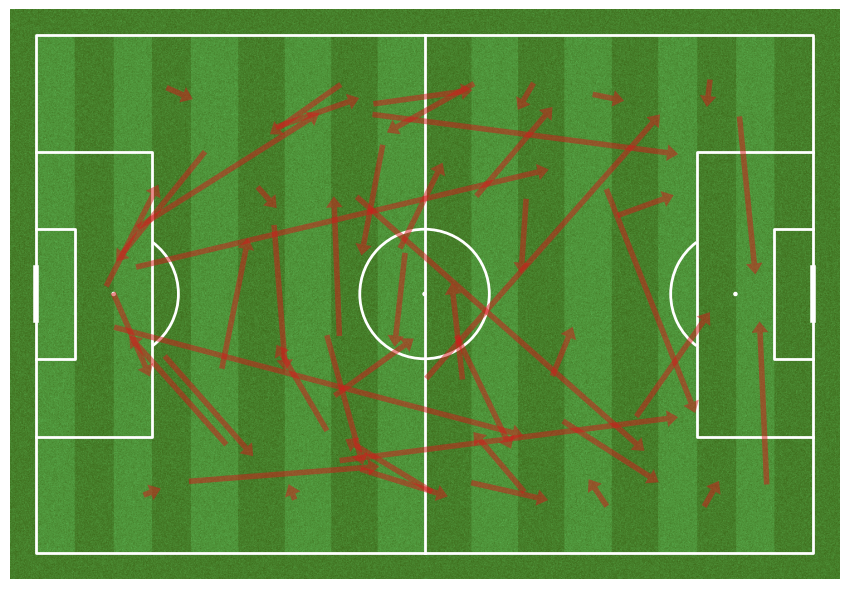

In [26]:
#Avec 50 cluster
model = KMeans(n_clusters=50)
features = df[['x1', 'y1', 'x2', 'y2']]
fit = model.fit(features)

pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
for coords in fit.cluster_centers_:
  p = pitch.arrows(*coords, alpha=0.5, color=red, ax=ax,
                   headaxislength=2, headlength=2, headwidth=3, width=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


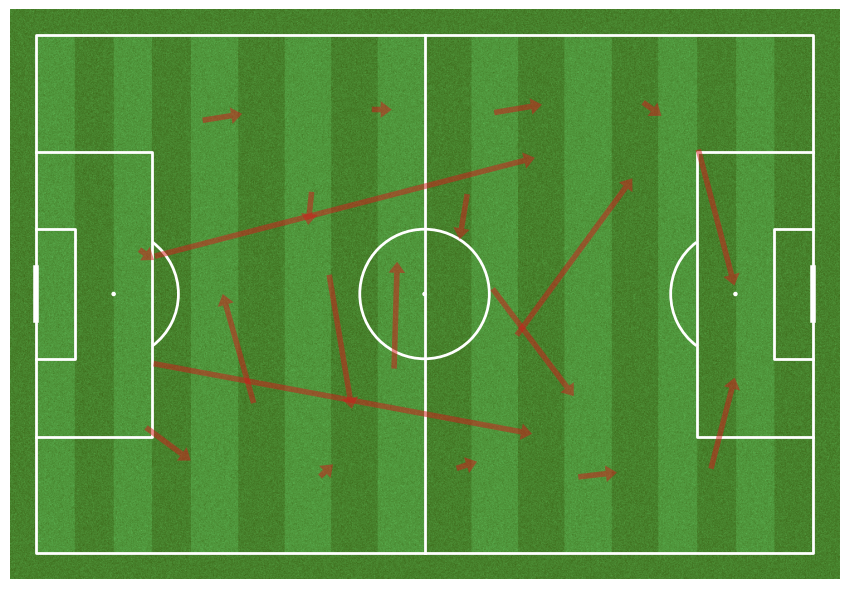

In [27]:
#Avec 20 cluster
model = KMeans(n_clusters=20)
features = df[['x1', 'y1', 'x2', 'y2']]
fit = model.fit(features)

pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
for coords in fit.cluster_centers_:
  p = pitch.arrows(*coords, alpha=0.5, color=red, ax=ax,
                   headaxislength=2, headlength=2, headwidth=3, width=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


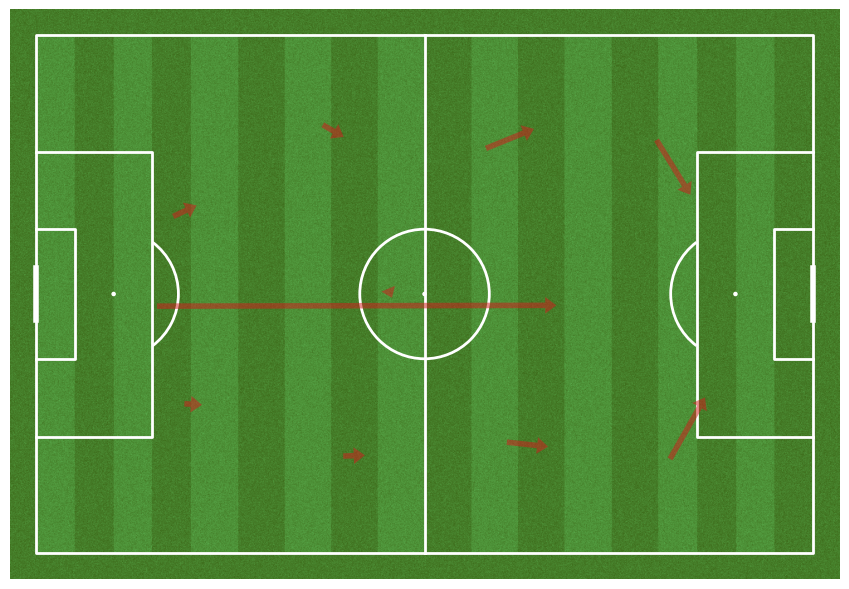

In [28]:
#Avec 10 cluster
model = KMeans(n_clusters=10)
features = df[['x1', 'y1', 'x2', 'y2']]
fit = model.fit(features)

pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
for coords in fit.cluster_centers_:
  p = pitch.arrows(*coords, alpha=0.5, color=red, ax=ax,
                   headaxislength=2, headlength=2, headwidth=3, width=4)

On voit le type de passes les plus faites en fonction de ce qui est dans notre base de donnée et de la granularité qu'on veut.

## Apprentissage supervisé

Maintenant qu'on a fait ça, on peut s'intéresser au machine learning ou apprentissage supervisé, on peut par exemple imaginer un modèle qui s'entraine sur les données d'une équipe ou d'un joueur en particulier, pour analyser si une passe ser réussie ou non, ou si un but sera mis ou non lors d'un tir, pour ensuite regarder quelles sont les spécifictés qui font que le but est marqué ou non, par IA, pour nous donner des insights différents de ceux de l'humain.

On a besoin de beaucoup de données, on va prendre toutes les passes de la coupe du monde 2022

### Sur les passes

In [29]:
all_events = []

for m in tqdm(matches_):
    events = sb.events(match_id = m['match_id'])
    passes = events[(events['type'] == "Pass")]
    x1, y1 = np.array(passes['location'].tolist()).T
    x2, y2 = np.array(passes['pass_end_location'].tolist()).T
    outcome = np.array(
        [1 if pd.isna(o) else 0 for o in passes['pass_outcome'].values]).T
    evs = np.vstack((x1, y1, x2, y2, outcome)).T
    all_events.extend(evs)

100%|██████████| 64/64 [01:44<00:00,  1.64s/it]


On va utiliser le modèle de machine learning qui a le plus fait ses preuves et le plus connu : XGBoost. Je vais pas rentrer en détail dans le fonctionnement de l'algo mais l'idée est toujours la même, séparer le jeu de donnée en un set d'entrainement et de test, regarder les données qu'on a et regarder si la passe est réussie ou non, pour pouvoir prédire si une passe va être réussie ou non. Ici, comme ce qui est proposé dans le github, je vais utiliser seulement les coordonnées de départ et d'arriver des passes.

In [30]:
df = pd.DataFrame(all_events, columns=['x1', 'y1', 'x2', 'y2', 'outcome'])

X = df[['x1', 'y1', 'x2', 'y2']]
y = df['outcome']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=0)
fit = model.fit(X_train, y_train)

In [33]:
#Prediction de l'output en proba ou en valeur discrete
y_probs_train = model.predict_proba(X_train)[:, 1]
y_probs_test = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

Pour évaluer les performances de notre modèle, on utilise différentes métriques, l'accuracy, la precision et le rappel. Voici une explication : https://inside-machinelearning.com/recall-precision-f1-score/

On voit qu'on a pas spécialement de bonnes performances en rappel sur la classe 0, cela veut dire que parfois le modèle ne va pas détecter une mauvaise passe et va penser qu'elle a été réussie.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.48      0.57      2449
         1.0       0.89      0.96      0.92     11254

    accuracy                           0.87     13703
   macro avg       0.80      0.72      0.75     13703
weighted avg       0.86      0.87      0.86     13703



Une autre manière d'évaluer le modèle est avec les roc curve (https://fr.mathworks.com/discovery/roc-curve.html#:~:text=Les%20courbes%20ROC%20(fonctions%20d,compos%C3%A9e%20de%20deux%20classes%20distinctes.) L'idée globale est que l'on veut étudie le taux de vrais positifs par rapport aux faux postifs. Plus l'aire sous la courbe est proche de 1, plus le modèle est bon.

Comme on peut l'imaginer, les résultats sont meilleurs sur le set d'entrainement, mais on a quand même de bons résultats en général

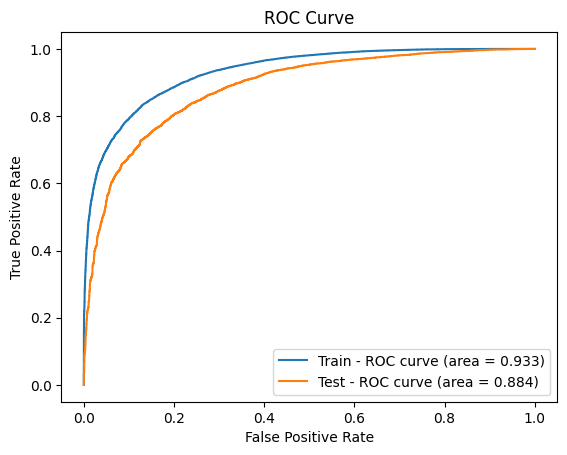

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_probs_test)

plt.plot(fpr, tpr, label='Train - ROC curve (area = {:.3f})'.format(auc_train))
plt.plot(fpr_, tpr_, label='Test - ROC curve (area = {:.3f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Nous pouvons maintenant visualiser certaines des passes et les prédicitions faites. On voit que les passes vers l'arriere sont les plus probabkes de réussir, tandis que les passes longues, les passes/centres devant le but ou les corners ont plus de chance d'être ratées.

<ipython-input-36-552cbfabad2b>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm_r')


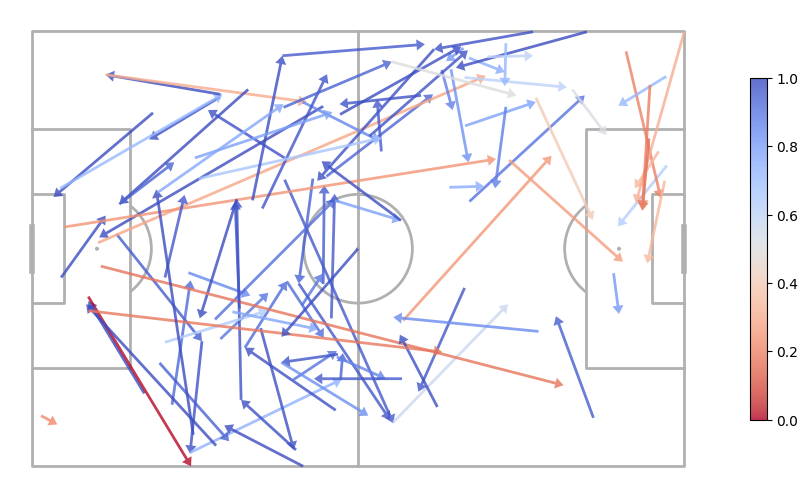

In [36]:
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm_r')

y_probs = model.predict_proba(df[['x1', 'y1', 'x2', 'y2']])[:, 1]
df['difficulty'] = y_probs

coords = df[['x1', 'y1', 'x2', 'y2']].values[100:200].T
colors = cmap(df['difficulty'].values[100:200])

pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.arrows(*coords, alpha=0.8, cmap='coolwarm_r', color=colors,
                  headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax)
plt.colorbar(p, shrink=0.6)

On va maintenant essayer d'aller un peu plus loin que le github est de mettre d'autres types de données sur les passes dans notre modélisations.

In [99]:
column_names = [
    "location",
    "pass_aerial_won",
    "pass_angle",
    "pass_body_part",
    "pass_cross",
    "pass_end_location",
    "pass_height",
    "pass_length",
    "pass_outcome",
    "pass_switch",
    "pass_technique",
    "pass_type"
]

passes_list = []

for m in tqdm(matches_):
    events = sb.events(match_id=m['match_id'])
    passes = events[events['type'] == "Pass"][column_names]
    passes_list.append(passes)

passes_df_0 = pd.concat(passes_list, ignore_index=True)

100%|██████████| 64/64 [01:31<00:00,  1.43s/it]


In [100]:
passes_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68515 entries, 0 to 68514
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           68515 non-null  object 
 1   pass_aerial_won    1483 non-null   object 
 2   pass_angle         68515 non-null  float64
 3   pass_body_part     64415 non-null  object 
 4   pass_cross         1486 non-null   object 
 5   pass_end_location  68515 non-null  object 
 6   pass_height        68515 non-null  object 
 7   pass_length        68515 non-null  float64
 8   pass_outcome       12169 non-null  object 
 9   pass_switch        1891 non-null   object 
 10  pass_technique     714 non-null    object 
 11  pass_type          12092 non-null  object 
dtypes: float64(2), object(10)
memory usage: 6.3+ MB


In [107]:
#On ne garde que les colonnes avec assez de données
passes_df = passes_df_0[['location', 'pass_angle', 'pass_body_part', 'pass_end_location', 'pass_height', 'pass_length', 'pass_outcome']]

In [108]:
passes_df

location  pass_angle pass_body_part pass_end_location  \
0       [61.0, 40.1]    2.943123     Right Foot      [43.1, 43.7]   
1       [39.7, 45.5]    1.473724     Right Foot      [42.3, 72.2]   
2       [42.3, 72.2]   -2.669646     Right Foot      [23.1, 62.4]   
3       [23.1, 62.4]    0.203045     Right Foot      [91.1, 76.4]   
4      [105.6, 74.4]   -1.476588     Right Foot     [108.0, 49.0]   
...              ...         ...            ...               ...   
68510  [107.6, 11.0]   -0.707542     Right Foot      [115.2, 4.5]   
68511   [120.0, 0.1]    1.808138     Right Foot     [108.8, 46.4]   
68512   [14.2, 48.5]    0.055649      Drop Kick      [87.8, 52.6]   
68513   [32.3, 27.5]    0.041185     Right Foot     [105.1, 30.5]   
68514   [31.8, 50.7]    0.277088     Right Foot     [108.1, 72.4]   

       pass_height  pass_length pass_outcome  
0      Ground Pass    18.258423          NaN  
1      Ground Pass    26.826294          NaN  
2      Ground Pass    21.556438          NaN  
3        High Pass    69.426216          NaN  
4      Ground Pass    25.513134   Incomplete  
...            ...          ...          ...  
68510  Ground Pass    10.000500          NaN  
68511    High Pass    47.635387          NaN  
68512    High Pass    73.714110      Unknown  
68513    High Pass    72.861786          NaN  
68514    High Pass    79.325780      Unknown  

[68515 rows x 7 columns]

In [109]:
#On créé la variable cible et on travaille sur les colonnes de coordonnées
passes_df['outcome'] = np.array([1 if pd.isna(o) else 0 for o in passes_df['pass_outcome'].values]).T
passes_df['x1'] = passes_df['location'].apply(lambda loc: loc[0])
passes_df['y1'] = passes_df['location'].apply(lambda loc: loc[1])
passes_df['x2'] = passes_df['pass_end_location'].apply(lambda loc: loc[0])
passes_df['y2'] = passes_df['pass_end_location'].apply(lambda loc: loc[1])

passes_df = passes_df.drop('pass_outcome', axis=1)
passes_df = passes_df.drop('location', axis = 1)
passes_df = passes_df.drop('pass_end_location', axis = 1)

<ipython-input-109-4a81e554fe55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_df['outcome'] = np.array([1 if pd.isna(o) else 0 for o in passes_df['pass_outcome'].values]).T
<ipython-input-109-4a81e554fe55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_df['x1'] = passes_df['location'].apply(lambda loc: loc[0])
<ipython-input-109-4a81e554fe55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [114]:
#on vire les données manquantes
passes_df = passes_df.dropna()

In [111]:
passes_df

pass_angle pass_body_part  pass_height  pass_length  outcome     x1  \
0        2.943123     Right Foot  Ground Pass    18.258423        1   61.0   
1        1.473724     Right Foot  Ground Pass    26.826294        1   39.7   
2       -2.669646     Right Foot  Ground Pass    21.556438        1   42.3   
3        0.203045     Right Foot    High Pass    69.426216        1   23.1   
4       -1.476588     Right Foot  Ground Pass    25.513134        0  105.6   
...           ...            ...          ...          ...      ...    ...   
68510   -0.707542     Right Foot  Ground Pass    10.000500        1  107.6   
68511    1.808138     Right Foot    High Pass    47.635387        1  120.0   
68512    0.055649      Drop Kick    High Pass    73.714110        0   14.2   
68513    0.041185     Right Foot    High Pass    72.861786        1   32.3   
68514    0.277088     Right Foot    High Pass    79.325780        0   31.8   

         y1     x2    y2  
0      40.1   43.1  43.7  
1      45.5   42.3  72.2  
2      72.2   23.1  62.4  
3      62.4   91.1  76.4  
4      74.4  108.0  49.0  
...     ...    ...   ...  
68510  11.0  115.2   4.5  
68511   0.1  108.8  46.4  
68512  48.5   87.8  52.6  
68513  27.5  105.1  30.5  
68514  50.7  108.1  72.4  

[64415 rows x 9 columns]

In [112]:
#On encode les variables catégorielles
passes_df = pd.get_dummies(passes_df)

In [113]:
passes_df

pass_angle  pass_length  outcome     x1    y1     x2    y2  \
0        2.943123    18.258423        1   61.0  40.1   43.1  43.7   
1        1.473724    26.826294        1   39.7  45.5   42.3  72.2   
2       -2.669646    21.556438        1   42.3  72.2   23.1  62.4   
3        0.203045    69.426216        1   23.1  62.4   91.1  76.4   
4       -1.476588    25.513134        0  105.6  74.4  108.0  49.0   
...           ...          ...      ...    ...   ...    ...   ...   
68510   -0.707542    10.000500        1  107.6  11.0  115.2   4.5   
68511    1.808138    47.635387        1  120.0   0.1  108.8  46.4   
68512    0.055649    73.714110        0   14.2  48.5   87.8  52.6   
68513    0.041185    72.861786        1   32.3  27.5  105.1  30.5   
68514    0.277088    79.325780        0   31.8  50.7  108.1  72.4   

       pass_body_part_Drop Kick  pass_body_part_Head  \
0                         False                False   
1                         False                False   
2                         False                False   
3                         False                False   
4                         False                False   
...                         ...                  ...   
68510                     False                False   
68511                     False                False   
68512                      True                False   
68513                     False                False   
68514                     False                False   

       pass_body_part_Keeper Arm  pass_body_part_Left Foot  \
0                          False                     False   
1                          False                     False   
2                          False                     False   
3                          False                     False   
4                          False                     False   
...                          ...                       ...   
68510                      False                     False   
68511                      False                     False   
68512                      False                     False   
68513                      False                     False   
68514                      False                     False   

       pass_body_part_No Touch  pass_body_part_Other  \
0                        False                 False   
1                        False                 False   
2                        False                 False   
3                        False                 False   
4                        False                 False   
...                        ...                   ...   
68510                    False                 False   
68511                    False                 False   
68512                    False                 False   
68513                    False                 False   
68514                    False                 False   

       pass_body_part_Right Foot  pass_height_Ground Pass  \
0                           True                     True   
1                           True                     True   
2                           True                     True   
3                           True                    False   
4                           True                     True   
...                          ...                      ...   
68510                       True                     True   
68511                       True                    False   
68512                      False                    False   
68513                       True                    False   
68514                       True                    False   

       pass_height_High Pass  pass_height_Low Pass  
0                      False                 False  
1                      False                 False  
2                      False                 False  
3                       True                 False  
4                      False                 False  
...                      ...        

In [172]:
#Et on fait l'entrainement

X = passes_df.drop("outcome", axis=1)
y = passes_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = xgb.XGBClassifier(random_state=0)
fit = model.fit(X_train, y_train)

In [173]:
#Prediction de l'output en proba ou en valeur discrete
y_probs_train = model.predict_proba(X_train)[:, 1]
y_probs_test = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      2223
           1       0.93      0.95      0.94     10660

    accuracy                           0.90     12883
   macro avg       0.82      0.80      0.81     12883
weighted avg       0.89      0.90      0.89     12883



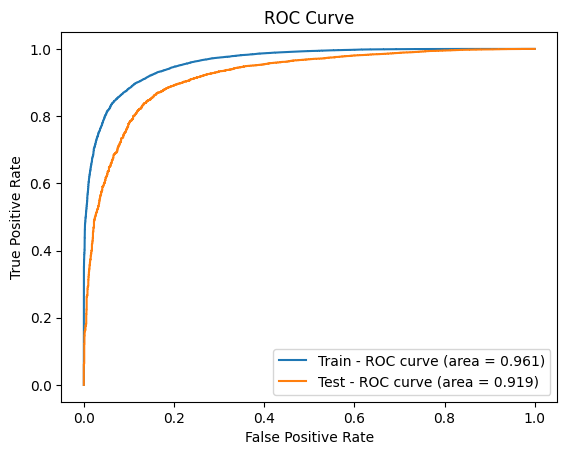

In [175]:
auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_probs_test)

plt.plot(fpr, tpr, label='Train - ROC curve (area = {:.3f})'.format(auc_train))
plt.plot(fpr_, tpr_, label='Test - ROC curve (area = {:.3f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

On voit qu'on a quand même de bien meilleurs résultats avec les données supplémentaires.

On peut étudier l'importance des différents features, c'est pour l'explicabilité des modèles.

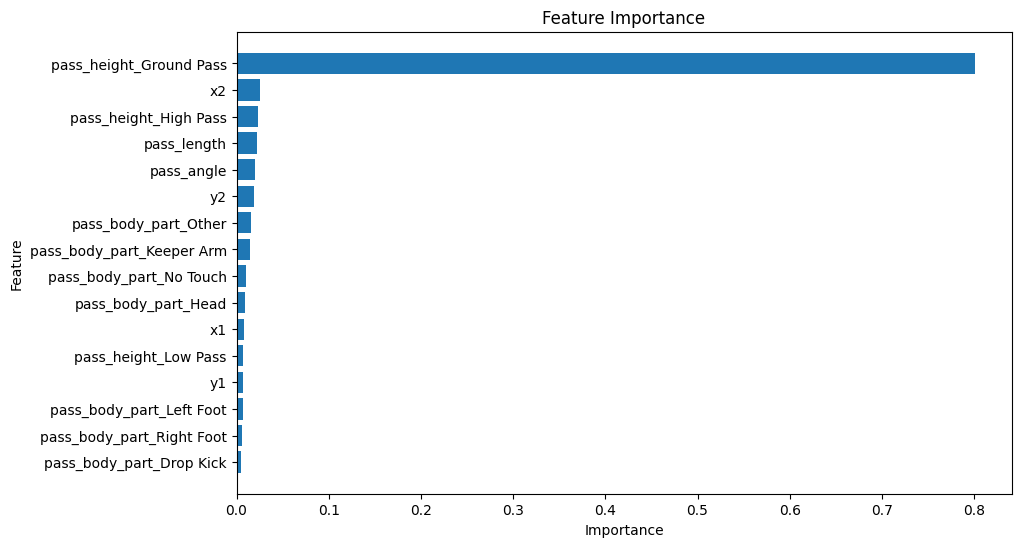

In [121]:
feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

import matplotlib.pyplot as plt

# Tracer un graphe montrant l'importance des fonctionnalités
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les fonctionnalités les plus importantes en haut
plt.show()


On peut également étudier les shap values qui permettent d'aller un peu plus loin dans l'interprétation, voir l'impact positif ou négatif des différentes variables (assez compliqué techniquement,ça se base sur la théorie des jeux).

On voit par exemple que plus la passe est proche du gardien plus elle a de chances de réussir, plus elle est longue et plus elle a de mal....

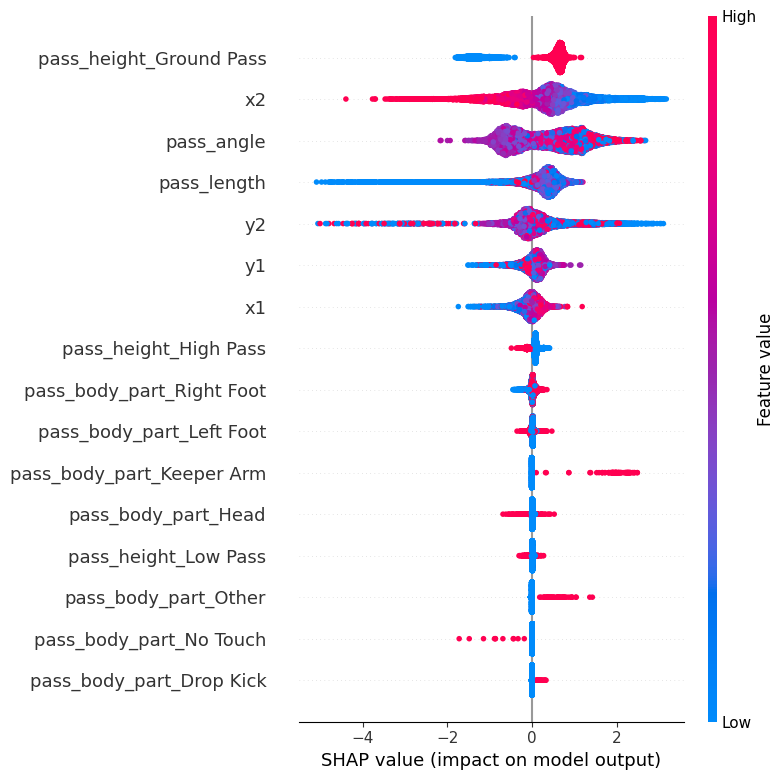

In [176]:
import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

On peut également interpréter localement, pour une seule passe, comprendre les variables qui ont fait qu'elles ont réussi ou échouer. Par exemple, dans ce cas, le fait que la passe soit au sol et qu'elle fasse une ongueur de 11,43 a beaucoup joué sur le fait qu'elle soit réussie, tandis que l'angle et la coordonnée joue contre le fait qu'elle réussisse.

In [177]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])

### Sur les tirs

Faisons maintenant le même travail pour les tirs

In [132]:
column_names = [
    "location",
    "shot_body_part",
    "shot_end_location",
    "shot_first_time",
    "shot_freeze_frame",
    "shot_key_pass_id",
    "shot_outcome",
    "shot_statsbomb_xg",
    "shot_technique",
    "shot_type"
]
shots_list = []

for m in tqdm(matches_):
    events = sb.events(match_id=m['match_id'])
    shots = events[events['type'] == "Shot"][column_names]
    shots_list.append(shots)

shots_df_0 = pd.concat(shots_list, ignore_index=True)

100%|██████████| 64/64 [02:30<00:00,  2.35s/it]


In [133]:
shots_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           1494 non-null   object 
 1   shot_body_part     1494 non-null   object 
 2   shot_end_location  1494 non-null   object 
 3   shot_first_time    468 non-null    object 
 4   shot_freeze_frame  1436 non-null   object 
 5   shot_key_pass_id   1039 non-null   object 
 6   shot_outcome       1494 non-null   object 
 7   shot_statsbomb_xg  1494 non-null   float64
 8   shot_technique     1494 non-null   object 
 9   shot_type          1494 non-null   object 
dtypes: float64(1), object(9)
memory usage: 116.8+ KB


On a beaucoup moins de données, travaillons quand même sur celles-ci mais il faudrait prendre plus de matchs

In [153]:
shots_df = shots_df_0[['location', 'shot_body_part', 'shot_end_location', 'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type']]

In [154]:
shots_df

location shot_body_part   shot_end_location shot_outcome  \
0      [96.0, 38.8]      Left Foot       [108.2, 38.5]      Blocked   
1     [113.1, 40.7]      Left Foot  [114.8, 40.6, 1.6]        Saved   
2     [103.8, 41.9]     Right Foot  [115.5, 39.1, 1.0]        Saved   
3     [112.2, 36.8]           Head  [120.0, 35.3, 3.5]        Off T   
4      [97.8, 51.5]      Left Foot  [120.0, 36.1, 0.6]         Post   
...             ...            ...                 ...          ...   
1489  [118.2, 43.9]           Head  [120.0, 44.1, 1.1]         Post   
1490  [102.5, 24.2]     Right Foot  [120.0, 33.7, 0.5]        Off T   
1491  [114.4, 36.8]           Head  [119.2, 39.4, 2.1]        Saved   
1492   [95.0, 30.2]     Right Foot        [96.4, 30.9]      Blocked   
1493  [108.8, 46.4]           Head  [118.8, 43.8, 2.4]        Saved   

      shot_statsbomb_xg shot_technique  shot_type  
0              0.036566    Half Volley  Open Play  
1              0.353289    Half Volley  Open Play  
2              0.069527    Half Volley  Open Play  
3              0.081609         Normal  Open Play  
4              0.030002         Normal  Open Play  
...                 ...            ...        ...  
1489           0.568312         Normal  Open Play  
1490           0.028724         Normal  Open Play  
1491           0.145394         Normal  Open Play  
1492           0.028684         Normal  Open Play  
1493           0.022084         Normal  Open Play  

[1494 rows x 7 columns]

In [155]:
shots_df['outcome'] = shots_df['shot_outcome'].apply(lambda x: 1 if x == 'Goal' else 0)
shots_df['x1'] = shots_df['location'].apply(lambda loc: loc[0])
shots_df['y1'] = shots_df['location'].apply(lambda loc: loc[1])
shots_df['x2'] = shots_df['shot_end_location'].apply(lambda loc: loc[0])
shots_df['y2'] = shots_df['shot_end_location'].apply(lambda loc: loc[1])

shots_df = shots_df.drop('location', axis = 1)
shots_df = shots_df.drop('shot_end_location', axis = 1)
shots_df = shots_df.drop('shot_outcome', axis = 1)

<ipython-input-155-bd5eff4a089e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['outcome'] = shots_df['shot_outcome'].apply(lambda x: 1 if x == 'Goal' else 0)
<ipython-input-155-bd5eff4a089e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['x1'] = shots_df['location'].apply(lambda loc: loc[0])


In [156]:
shots_df = pd.get_dummies(shots_df)

In [157]:
shots_df

shot_statsbomb_xg  outcome     x1    y1     x2    y2  \
0              0.036566        0   96.0  38.8  108.2  38.5   
1              0.353289        0  113.1  40.7  114.8  40.6   
2              0.069527        0  103.8  41.9  115.5  39.1   
3              0.081609        0  112.2  36.8  120.0  35.3   
4              0.030002        0   97.8  51.5  120.0  36.1   
...                 ...      ...    ...   ...    ...   ...   
1489           0.568312        0  118.2  43.9  120.0  44.1   
1490           0.028724        0  102.5  24.2  120.0  33.7   
1491           0.145394        0  114.4  36.8  119.2  39.4   
1492           0.028684        0   95.0  30.2   96.4  30.9   
1493           0.022084        0  108.8  46.4  118.8  43.8   

      shot_body_part_Head  shot_body_part_Left Foot  shot_body_part_Other  \
0                   False                      True                 False   
1                   False                      True                 False   
2                   False                     False                 False   
3                    True                     False                 False   
4                   False                      True                 False   
...                   ...                       ...                   ...   
1489                 True                     False                 False   
1490                False                     False                 False   
1491                 True                     False                 False   
1492                False                     False                 False   
1493                 True                     False                 False   

      shot_body_part_Right Foot  ...  shot_technique_Diving Header  \
0                         False  ...                         False   
1                         False  ...                         False   
2                          True  ...                         False   
3                         False  ...                         False   
4                         False  ...                         False   
...                         ...  ...                           ...   
1489                      False  ...                         False   
1490                       True  ...                         False   
1491                      False  ...                         False   
1492                       True  ...                         False   
1493                      False  ...                         False   

      shot_technique_Half Volley  shot_technique_Lob  shot_technique_Normal  \
0                           True               False                  False   
1                           True               False                  False   
2                           True               False                  False   
3                          False               False                   True   
4                          False               False                   True   
...                          ...                 ...                    ...   
1489                       False               False                   True   
1490                       False               False                   True   
1491                       False               False                   True   
1492                       False               False                   True   
1493                       False               False                   True   

      shot_technique_Overhead Kick  shot_technique_Volley  shot_type_Corner  \
0                            False                  False             False   
1                            False                  False             False   
2                            False                  False             False   
3                            False                  False             False   
4                            False                  False             False   
...                            ...                    ...               

In [159]:
X = shots_df.drop("outcome", axis=1)
y = shots_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = xgb.XGBClassifier(random_state=0)
fit = model.fit(X_train, y_train)

In [160]:
#Prediction de l'output en proba ou en valeur discrete
y_probs_train = model.predict_proba(X_train)[:, 1]
y_probs_test = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       269
           1       0.70      0.70      0.70        30

    accuracy                           0.94       299
   macro avg       0.83      0.83      0.83       299
weighted avg       0.94      0.94      0.94       299



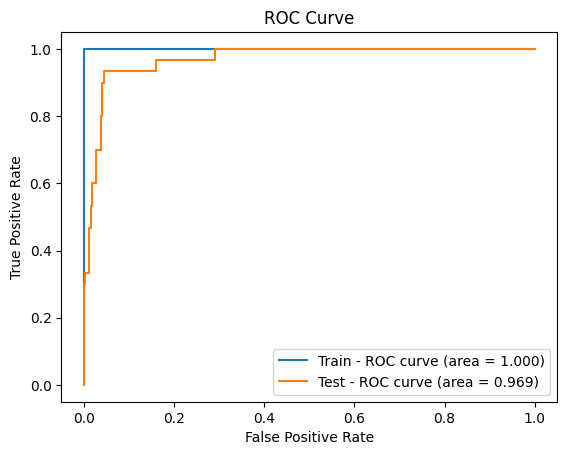

In [162]:
auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_probs_test)

plt.plot(fpr, tpr, label='Train - ROC curve (area = {:.3f})'.format(auc_train))
plt.plot(fpr_, tpr_, label='Test - ROC curve (area = {:.3f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

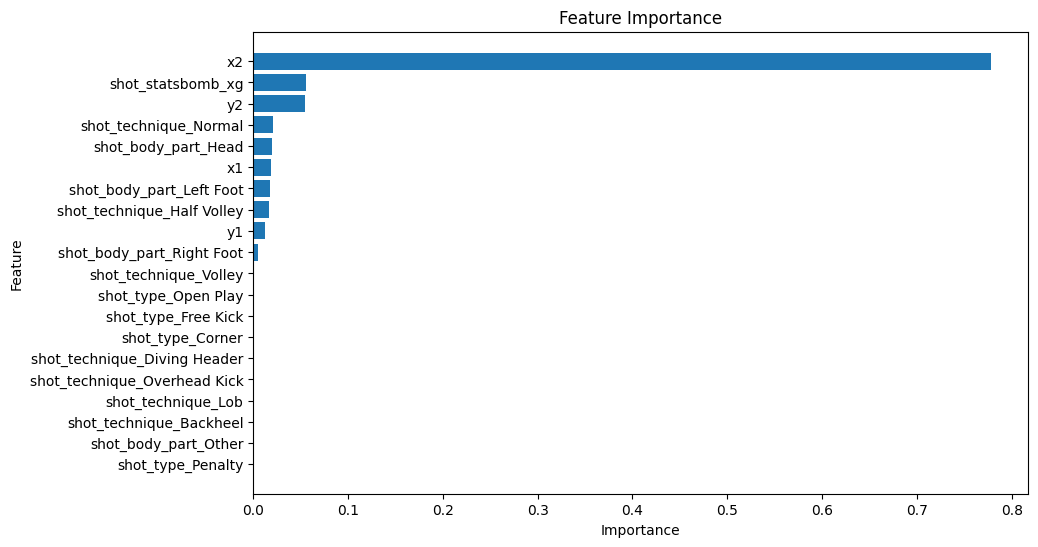

In [163]:
feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

import matplotlib.pyplot as plt

# Tracer un graphe montrant l'importance des fonctionnalités
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les fonctionnalités les plus importantes en haut
plt.show()


In [170]:
import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

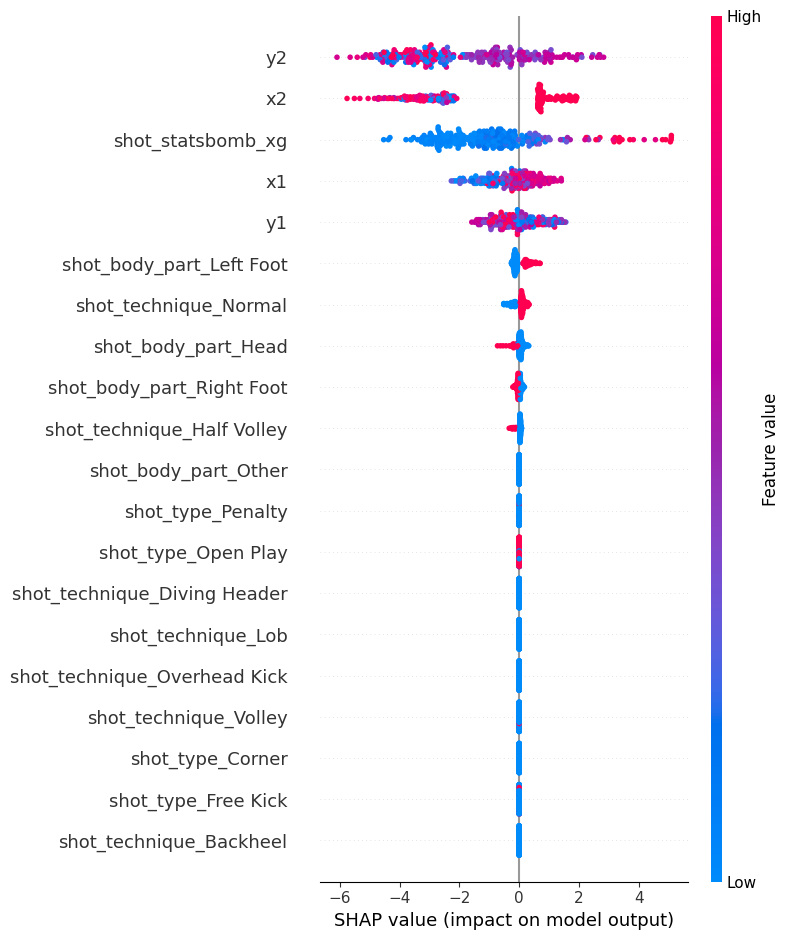

In [171]:
shap.summary_plot(shap_values, X_test)

On a quand même de bons résultats et les données les plus importantes semblent cohérentes. Je te laisserai jouer avec l'interprétabilité des modèles.

## Partie 2 : Tracking

Dans cette deuxième partie on va voir le tracking des joueurs, les données viennent de metrica (https://metrica-sports.com/) grâce à kloppy (https://kloppy.pysport.org/). Comme on peut le voir, on a toutes les données de tracking à intervalle régulier

In [178]:
dataset = metrica.load_open_data(
    match_id=1,
    coordinates="metrica"
)

df = dataset.to_pandas()
df.head(5)


period_id  timestamp ball_state ball_owning_team_id   ball_x   ball_y  \
0          1       0.00       None                None  0.45472  0.61291   
1          1       0.04       None                None  0.49645  0.59344   
2          1       0.08       None                None  0.53716  0.57444   
3          1       0.12       None                None  0.55346  0.57769   
4          1       0.16       None                None  0.55512  0.59430   

  ball_z  home_11_x  home_11_y home_11_d  ... home_13_d  home_13_s  away_28_x  \
0   None    0.00082    0.51762      None  ...       NaN        NaN        NaN   
1   None    0.00096    0.51762      None  ...       NaN        NaN        NaN   
2   None    0.00114    0.51762      None  ...       NaN        NaN        NaN   
3   None    0.00121    0.51762      None  ...       NaN        NaN        NaN   
4   None    0.00129    0.51762      None  ...       NaN        NaN        NaN   

   away_28_y  away_28_d  away_28_s  home_14_x home_14_y home_14_d  home_14_s  
0        NaN        NaN        NaN        NaN       NaN       NaN        NaN  
1        NaN        NaN        NaN        NaN       NaN       NaN        NaN  
2        NaN        NaN        NaN        NaN       NaN       NaN        NaN  
3        NaN        NaN        NaN        NaN       NaN       NaN        NaN  
4        NaN        NaN        NaN        NaN       NaN       NaN        NaN  

[5 rows x 119 columns]

In [179]:
#Paramètres importants

frame_rate = 25
adjust = np.array([length, width])

Nous allons maintenant faire quelques analyses sur le déplacement des joueurs



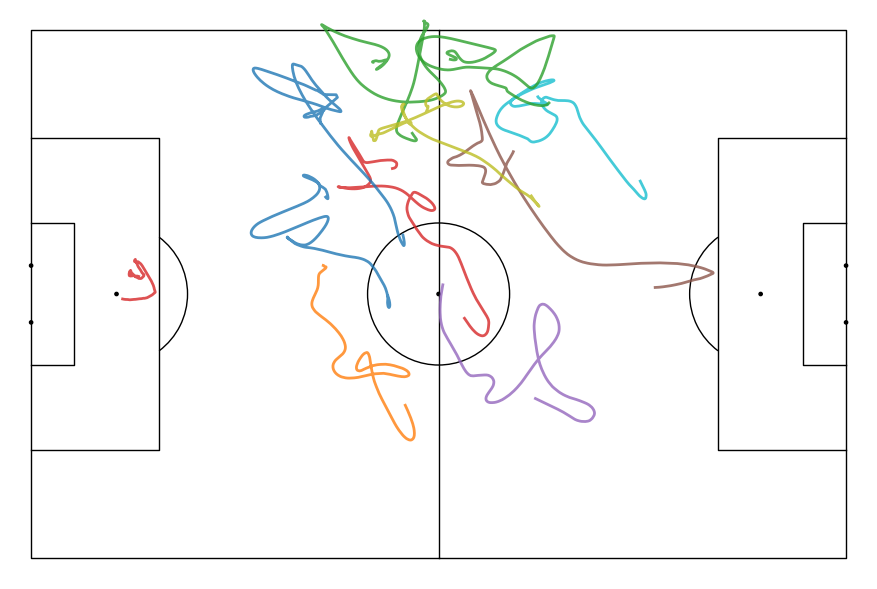

In [180]:
metrica_attrs = {"pitch_type": "metricasports",
                 "pitch_length": length,
                 "pitch_width": width,
                 "line_color": "black",
                 "linewidth": 1,
                 "goal_type": "circle"}

hj = list(set([x.split("_")[1] for x in df.columns if "home" in x]))


start, stop = 4000, 5000 # Frame Range

pitch = mpl.Pitch(**metrica_attrs)
fig, ax = pitch.draw(figsize=(9,6))

for j in hj:
    path = df[['home_{}_x'.format(j),
               'home_{}_y'.format(j)]].values[start:stop]
    pitch.plot(*path.T, lw=2, alpha=0.8, ax=ax)

In [ ]:
On voi

On voit qu'on peut analyser les trajectoires des ballons et des joueurs. Je ne vais pas aller plus loin ici car on utilise pas forcément l'ia ici (on pourrait l'utiliser pour créer un modèle de tracking, mais autre question), mais on voit qu'on peut analyser beaucoup d'évenements et de positionnements.


## Conclusion et ouverture

- On a des bibliothèques qui nous donnent les données et les visualisation qu'on veut
- On peut faire des analyses très visuelles
- On peut ressortir des insights par IA
- Dans tous les cas dépend des données, on peut étudier un joueur, une équipe, un championnat etc...
- Les modèles très intéressants car peuvent donner des analyses fines et automatiques, et la question de l'explicabilité peut permettre d'avoir des insights que le coach n'aurait pas forcément vu, donc peut aider à créer des stats conséquentes
- Les modèles qu'on a sont sympas mais bcp d'autres données à rentrer en jeu, le positionnement des autres joeurs etc, possible de faire un tracking et analyse en temps réel ? analyse de l'image ---> Skillcorner